#Proyecto final Métodos Computacionales
**Miguel Angel Rojas Aparicio**


##Propuesta
En la ingeniería Química se tiene el objetivo de desarrollar nuevos productos y algunos de ellos implican conocer el comportamiento de las transferencias de materia y energía en los flujos que se encuentran a su alrededor. Algunos de estos productos, como los desodorantes y perfumes, requieren de modelar la transferencia de masa en un rango determinado de espacio en el cual sus efectos son significativos. Este rango viene determinado por la teoría de Capa Límite, en la cual la transferencia de masa tiene una mayor importancia ante flujos externos para determinar los parámetros de diseño del producto final. Las ecuaciones diferenciales desarrolladas por Blasius para estimar esta capa límite presentan el gran problema de que no pueden resolverse manualmente. La idea sería que por medio de la solución de estas ecuaciones por medio del método de Runge-Kutta de cuarto orden se pueda realizar una animación de la transferencia de masa para unas condiciones iniciales determinadas a través del tiempo y la variación de concentraciones a través del espacio.

Una vez realizada esta modelación es posible estimar los parámetros necesarios para optimizar el funcionamiento del producto, tales como el tamaño, la concentración de la sustancia a utilizar, los costos y la duración del mismo. Por medio de la obtención de relaciones empíricas entre las variables mencionadas y las modeladas se puede optimizar las características del producto y realizar el diseño en tercera dimensión del producto final a ofrecer al consumidor. Las soluciones obtenidas podrían ser comparados con datos obtenidos empíricamente en la literatura que permitan estimar la utilidad o la cercanía que pueda tener a la realidad para que pudiera aplicarse en esta industria.

##Introducción

La transferencia de masa se da en dos tipos principales: convección y conducción. La conducción se encuentra modelada principalmente por medio de las leyes de Fick que involucran gradientes de concentración y difusividades másicas. A pesar de ello, la mayoría de productos que se desarrollan en la industria le da una mayor importancia a las transferencias de masa convectivas que se desarrollan al entrar en contacto con el aire del medio ambiente. Para modelar este tipo de transferencia es necesario agregar algunos términos convectivos que dependen de la velocidad del fluido a su alrededor y la distancia a la cual se encuentran de la superficie que realiza dicha transferencia. En principio se puede establecer un espacio (capa límite) en el cual esta transferencia es fácilmente modelable y de allí determinar parámetros como los coeficientes convectivos másicos que permiten extrapolar su comportamiento de una manera cercana.

Para un perfume de compuesto A que se encuentra finamente esparcido en una placa ubicada a lo largo del eje x, con una concentración en la superficie $C_{As}=0.5mol/m^3$ se realiza el análisis de la capa límite másica a una sustancia de sus alrededores a una velocidad de $ V_∞=150cm/s$ y con una concentración del compuesto a una distancia suficientemente lejana $C_{A∞} = 0.1 mol/m^3$. La difusividad másica del compuesto, en su mayor parte etanol, corresponde a $102*10^{-3} cm^2/s$. Debido a que se va a realizar la difusión en el aire se puede asumir que la difusividad másica es equivalente a la viscosidad cinemática: $D_{AB}=\nu$

![](https://raw.githubusercontent.com/marojas11/MC/master/Proyecto/Proyecto.png)

Partiendo de la segunda ley de Fick y teniendo en cuenta el término de transferencia convectiva en medio de la capa límite se puede determinar una ecuación diferencial que permita estimar el tamaño de la capa límite y los parámetros para el cálculo de los coeficientes convectivos.

$$v_x\frac{ ∂C_A}{∂x}+v_y\frac{∂C_A}{∂y}=D_{AB}\frac{∂^2 C_A}{∂y^2} $$

Para facilitar el trabajo de las variables se procede con la adimensionalización del espacio en términos de la velocidad de flujo de los alrededores $v_∞$ y la viscosidad cinemática $υ$

$$η=y/2 \sqrt{v_∞/υx}$$

Con base en esta variable adimensional se define la función de flujo de masa a partir de la cual se definen las velocidades y las concentraciones por medio de la analogía en el comportamiento de los gradientes de velocidad con los de concentración
$$ψ=f(η) \sqrt{υxv_∞}$$




##Desarrollo

En primer lugar se procede a realizar la derivación simbólica de las velocidades y las concentraciones para realizar el reemplazo en la segunda ley de Fick y obtener la ecuación diferencial a resolver.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from sympy import *
#Mejorar el estilo de impresión
init_printing(use_unicode=True)

vx, vy, D_AB, dx,dy,d2y, eta, y, v_inf, nu,n, x, psi=symbols('vx vy D_AB dx dy d2y eta y v_inf nu n x psi ')

f=Function('f')(eta)
D_AB=nu

n=y/2*(v_inf**.5/(nu**.5*x**.5))
psi=f*(nu**.5)*x**.5*(v_inf)**.5


$$v_x=∂ψ/∂y$$


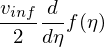

In [4]:
vx=nsimplify(psi.diff(eta)*n.diff(y))
eval("vx")


$$v_y=-∂ψ/∂x$$



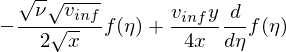

In [5]:
vy=simplify(nsimplify(-(diff(psi,x)+n.diff(x)*nu**.5*psi.diff(eta)/nu**.5)))
eval("vy")

$$∂C_A/∂x=∂v_x/∂x$$

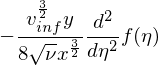

In [6]:
dx=simplify(nsimplify(n.diff(x)*diff(f.diff(eta),eta)*vx/f.diff(eta)))
simplify(nsimplify(n.diff(x)*diff(f.diff(eta),eta)*vx/f.diff(eta)))

$$∂C_A/∂y=∂v_x/∂y$$

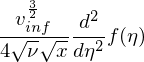

In [7]:
dy=simplify(nsimplify(n.diff(y)*diff(f.diff(eta),eta)*vx/f.diff(eta)))
simplify(nsimplify(n.diff(y)*diff(f.diff(eta),eta)*vx/f.diff(eta)))

$$∂^2C_A/∂y^2=∂^2v_x/∂y^2$$

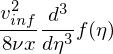

In [8]:
d2y=simplify(nsimplify(n.diff(y)*diff(diff(f.diff(eta),eta),eta)*dy/diff(f.diff(eta),eta)))
simplify(nsimplify(n.diff(y)*diff(diff(f.diff(eta),eta),eta)*dy/diff(f.diff(eta),eta)))

Al derivar las expresiones para la velocidad y la concentración, se puede evaluar en la ecuación modificada de Fick y se obtiene que
$$-v_x\frac{ ∂C_A}{∂x}-v_y\frac{∂C_A}{∂y}+D_{AB}\frac{∂^2 C_A}{∂y^2}=0 $$

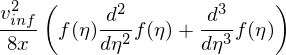

In [9]:
simplify(nsimplify(-vx*dx-vy*dy+d2y*D_AB))

$f(\eta)*f^{\prime\prime}(\eta)+f^{\prime\prime\prime}(\eta)=0$

Debido a que la función $f(\eta)$ depende del espacio definimos que las condiciones de frontera corresponden a: 

$
f(0)=f^\prime(0)=0$

$f^\prime(\infty)=2$

Esto se debe a que la concentración adimensional y normalizada corresponde a la mitad de la primera derivada de f

$f^\prime(η)/2=\frac{c_A-c_{A,s}}{c_{A,∞}- c_{A,s}}=\frac{C_A}{C_{A,∞}}$

Aquí tenemos el problema de que para que pueda obtenerse una correcta solución a esta ecuación es necesario que la condición inicial para la segunda derivada sea evaluada en 0. Para eso tomamos un valor considerablemente grande para que pueda ser considerado como infinito en este contexto. Este valor puede tomarse como 10 debido a que el orden de los valores de la variable adimensional $\eta$ son mucho menores. 

Para hallar el valor correcto de este valor es necesario realizar una serie de soluciones a la ecuación fijando distintos valores a la segunda derivada evaluada en cero $ f^\prime (0)$hasta encontrar donde los valores de la primera derivada en el valor de 10 $f^{\prime}(10)=2$. Para ello definimos lo siguiente

$$f^{\prime\prime}(\eta)=f2$$
$$f^{\prime}(\eta)=f1$$
$$f(\eta)=f0$$

$$f^{\prime\prime\prime}(\eta)=-f(\eta)*f^{\prime\prime}(\eta)=func3(f0,f2)$$

In [10]:
def func3(f0,f2):
    return -f0*f2

def RungeKutta(eta,t, f0, f1, f2):
    
    
    k1=eta*f1           #f0=t*f1
    l1=eta*f2           #f1=t*f2
    m1=eta*func3(f0,f2) #f2=t*func3
    
    k2=eta*(f1+l1/2.)
    l2=eta*(f2+m1/2.)
    m2=eta*func3(f0+k1/2.,f2+m1/2.)
    
    k3=eta*(f1+l2/2.)
    l3=eta*(f2+m2/2.)
    m3=eta*func3(f0+k2/2.,f2+m2/2.)
    
    k4=eta*(f1+l3)           
    l4=eta*(f2+m3)           
    m4=eta*func3(f0+k3,f2+m3) 
    
    f0+=(k1+2.*k2+2.*k3+k4)/6.
    f1+=(l1+2.*l2+2.*l3+l4)/6.
    f2+=(m1+2.*m2+2.*m3+m4)/6.
    t+=eta
    return t,f0, f1, f2
    
def Itera(numIter,eta,t,f0, f1, f2):
    
    step=eta/numIter
    
    #Inicialización arreglo para almacenar posiciones
    history=np.array([[t,f0, f1, f2]])
    
    #Ciclo de Iteración para el método de RungeKutta
    for __ in range(numIter):
        #Aplicar rungekutta con el lapso de Tiempo calculado
        a=RungeKutta(step,t,f0, f1, f2)
        t=a[0]
        f0=a[1]
        f1=a[2]
        f2=a[3]
        #Almacenar las posiciones y velocidades en cada tiempo
        history=append(history,[[t,f0, f1, f2]],axis=0)
    
    return history
    
    

In [14]:
f2_0=[]
f1_inf=[]
eta=10.

for i in range(1,2000):
    f0=0.
    f1=0.
    t=0.
    f2_0.append(i/1000.)
    f2=i/1000.
    x=Itera(1000,eta,t,f0, f1, f2)
    f1_inf.append(x[-1,2])
    
    if abs(f1_inf[i-1]-2)<0.0005:
        value=f2_0[i-1]
        
    


Cuando f1(10)=2, el valor de f2(0)=  1.328


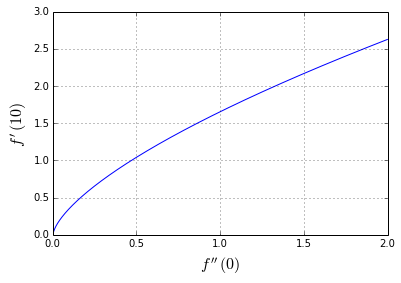

In [17]:

plot(f2_0,f1_inf)
grid()
xlabel('$f^{\ \prime \prime}(0)$', size=16)
ylabel('$f^{\  \prime}(10)$', size=16)

print "Cuando f1(10)=2, el valor de f2(0)= ",value

Una vez conocida la condición de frontera que nos faltaba se procede a resolver la ecuación de Blasius.

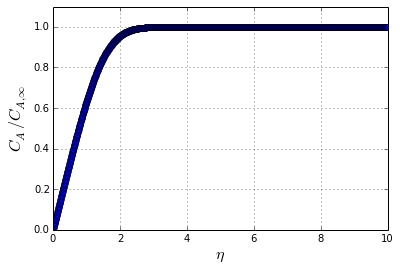

In [18]:
D_AB=102.e-3
eta=10.
f0=0
f1=0
f2=1.328
t=0
x=Itera(1000,eta,t,f0, f1, f2)
plot(x[:,0],x[:,2]/2.,'o')
xlabel('$\eta$', size=16)
ylabel('$C_A/C_{A,\infty}$', size=16)
ylim(0,1.1)
grid()
from scipy import interpolate
interpol= interpolate.interp1d(x[:,0],x[:,2]/2.,kind='linear')

Para visualizar mejor el perfil de concentraciones en el espacio realizaré el gráfico en las coordenadas x,y


In [19]:
xval=linspace(0.01,1,len(x[:,0])/2)
yval=linspace(1e-3,.05,len(x[:,0])/2)

xx,yy=meshgrid(xval,yval)
conc=interpol(yy/2.*sqrt(150./(D_AB*xx)))


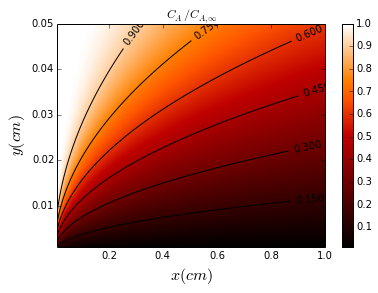

In [20]:
pcolor(xval,yval,conc,cmap='gist_heat')
colorbar()
C=contour(xval,yval,conc,colors='k') 
clabel(C)
xlabel('$x(cm)$', size=16)
ylabel('$y(cm)$', size=16)

title("$C_A/C_{A,\infty}$")


Una vez resuelta la ecuación diferencial de Blasius se puede estimar el coeficiente convetivo de transferencia de masa, el cual configura el alcance de difusión de la sustancia y que permite decidir los parámetros del producto a desarrollar. Este coeficiente se define de forma análoga a la ley de enfriamiento de Newton.

$h=\frac{\partial C_A}{\partial y}*1/C_{A,\infty}$

Tomando la derivada de la concentración adimensional con respecto a eta y dejando solo en términos de y se puede reemplazar en la ecuación anterior

$\left|\frac{\partial\left(2C_A/C_{A,\infty}\right)}{\partial \left(y/2*\sqrt{xv_\infty/υ}\right)}\right|_{y=0}=f^{\prime\prime}(0)$

$\frac{\partial C_A}{\partial y}=f^{\prime\prime}(0)/4*\sqrt{xv_\infty/υ}$

$h=\frac{f^{\prime\prime}(0)/4*\sqrt{xv_\infty/υ}}{C_{A,\infty}}$

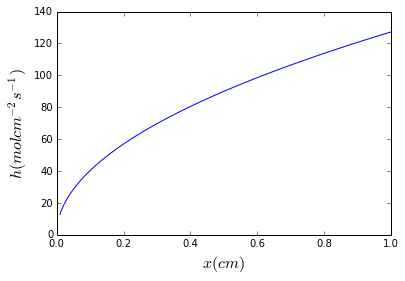

In [22]:
C_Ainf=0.1
h=value/4.*sqrt(xval*150./D_AB)/C_Ainf
plot(xval,h)
xlabel('$x(cm)$', size=16)
ylabel('$h(molcm^{-2}s^{-1})$', size=16)


##Conclusiones





##Bibliografía

Perry, R. & Green, D. (1987) Perry's Chemical Engineers' Handbook, 6th Ed

Petrila, T. & Trif, D. (2005) Basics of Fluid Mechanics and Introduction to Computational Fluid Dynamics. Springer Science & Business Media. Page 188.

Welty, J. & Wicks, C. & Wilson, R. (2007) Fundamentals of Momentum, Heat, and Mass Transfer. John Wiley & Sons: Fifth Edition